## 모델 불러오기

In [94]:
## 라이브러리 설치
##pip install trimesh

In [95]:
import trimesh

In [96]:
model = trimesh.load('./obj/model.stl')

In [97]:
model.show()

In [98]:
## 모델 내 중복된 꼭지점 합치기
## trimesh에서는 필요없음
# model.merge_vertices()

In [99]:
## 변수에 저장
vertices = model.vertices

## 샘플 추출

https://trimesh.org/trimesh.sample.html

## 시각화

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

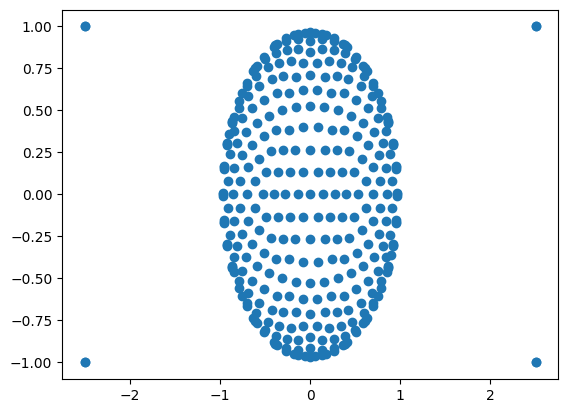

In [101]:
plt.scatter(vertices[:,0], vertices[:,1])

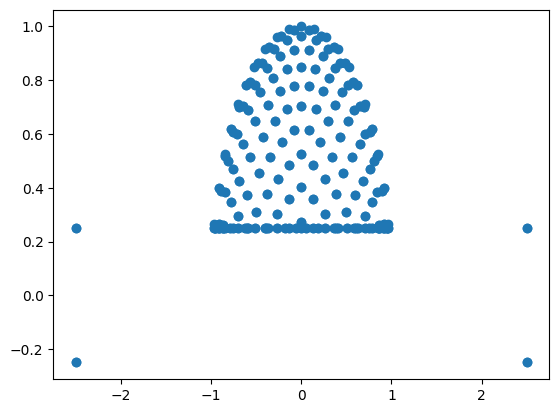

In [102]:
plt.scatter(vertices[:,0], vertices[:,2])

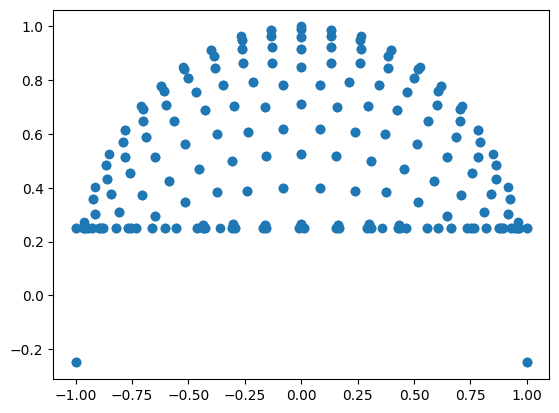

In [103]:
plt.scatter(vertices[:,1], vertices[:,2])

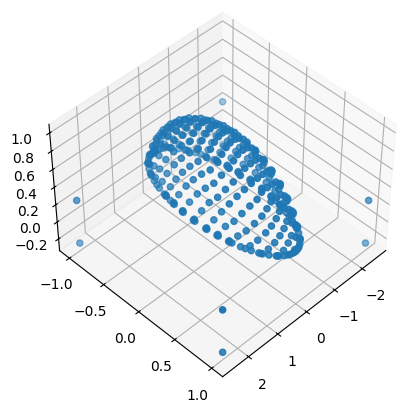

In [104]:
## 꼭지점 scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45, azim=45)
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2])

In [112]:
##sample_surface_even()은 샘플들이 서로 가까이 붙지않도록 배치
samples = trimesh.sample.sample_surface_even(model, 50)
points = samples[0]
points

TrackedArray([[-1.87723326,  0.0143863 ,  0.25      ],
              [ 0.98665723,  0.21239142,  0.25      ],
              [-0.23737012,  1.        , -0.0614349 ],
              [ 0.23163192, -0.97557278,  0.25      ],
              [-2.39513692, -1.        ,  0.16568119],
              [ 1.88602736,  0.53940159, -0.25      ],
              [ 0.75635417,  0.72477109, -0.25      ],
              [-2.1310893 ,  0.97405803,  0.25      ],
              [-0.5778964 ,  0.14975949, -0.25      ],
              [-0.86187922, -0.33115637, -0.25      ],
              [ 1.57964758,  0.66012613,  0.25      ],
              [-0.68646437,  0.03270531,  0.72302679],
              [ 1.3118494 ,  1.        ,  0.16629365],
              [-0.91453642,  0.99569595,  0.25      ],
              [-1.29733098,  0.03743273, -0.25      ],
              [-1.85717705,  0.12211666, -0.25      ],
              [-0.63251225, -0.80331522,  0.25      ],
              [-2.5       , -0.00500459, -0.00436414],
          

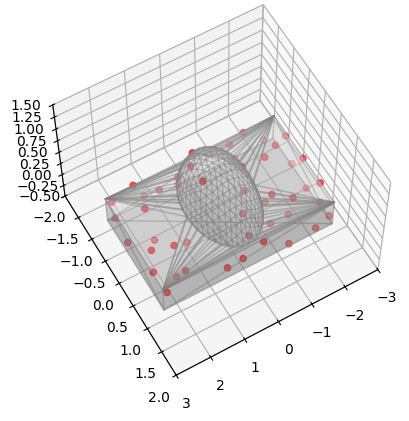

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## 점들 표시
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red')
## mesh 표현
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha= 0.3, edgecolor='gray')

## 보이는 각도 조정
ax.view_init(elev=60, azim=60)

## 축 크기 조정
plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

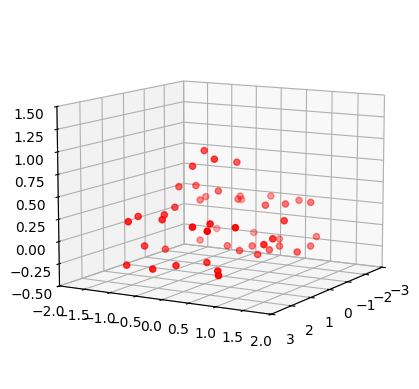

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha=0.5, edgecolor='gray', zorder=1)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', zorder=1)

ax.view_init(elev=10, azim=30)

plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

## 확률 밀도 함수 추정
### scipy 내 parzen method는 1차원 윈도우만 생성
https://sebastianraschka.com/Articles/2014_kernel_density_est.html

In [148]:
## 분석 라이브러리 설치
from scipy.stats import gaussian_kde

In [150]:
# 확률밀도함수 추정
kernel = gaussian_kde(points.T)
